# Heart Disease Prediction - EDA & Modeling

This notebook covers EDA and model training for heart disease prediction using the UCI Heart Disease dataset.

## 1. Setup and Imports

In [1]:
import sys
sys.path.insert(0, '..')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

# Colors for target classes
TARGET_PALETTE = {0: '#2E86AB', 1: '#C73E1D'}
print('Libraries loaded successfully!')

Libraries loaded successfully!


## 2. Data Loading

In [2]:
from src.data_loader import load_raw_data

# Load dataset
df = load_raw_data()
print(f'Dataset Shape: {df.shape}')
print(f'Total Samples: {len(df)}')
print(f'Features: {len(df.columns) - 1}')

INFO:src.data_loader:Loading dataset from /Users/sapna/Downloads/mlops-assignment/notebooks/../data/raw/heart.csv
INFO:src.data_loader:Loaded 303 samples with 14 features


Dataset Shape: (303, 14)
Total Samples: 303
Features: 13


## 3. Dataset Overview

In [3]:
# Display first few rows
print('First 5 rows of the dataset:')
df.head()

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Data types
print('Data Types:')
print(df.dtypes)

Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


In [5]:
# Descriptive statistics
print('\nDescriptive Statistics:')
df.describe().round(2)


Descriptive Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,299.00,301.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.67,4.73,0.46
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.94,1.94,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,1.00


### Feature Dictionary

| Feature | Description | Type |
|---------|-------------|------|
| age | Age in years | Numerical |
| sex | Sex (1=male, 0=female) | Categorical |
| cp | Chest pain type (0-3) | Categorical |
| trestbps | Resting blood pressure (mm Hg) | Numerical |
| chol | Serum cholesterol (mg/dl) | Numerical |
| fbs | Fasting blood sugar > 120 mg/dl (1=true) | Categorical |
| restecg | Resting ECG results (0-2) | Categorical |
| thalach | Maximum heart rate achieved | Numerical |
| exang | Exercise induced angina (1=yes) | Categorical |
| oldpeak | ST depression induced by exercise | Numerical |
| slope | Slope of peak exercise ST segment | Categorical |
| ca | Number of major vessels colored by fluoroscopy | Categorical |
| thal | Thalassemia (1=normal, 2=fixed defect, 3=reversible) | Categorical |
| target | Heart disease presence (1=yes, 0=no) | Target |

## 4. Missing Value Analysis

In [6]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

if len(missing_df) > 0:
    print('Columns with Missing Values:')
    print(missing_df)
else:
    print('No missing values in the dataset')

Columns with Missing Values:
      Missing Values  Percentage
ca                 4    1.320132
thal               2    0.660066


## 5. Target Variable Analysis

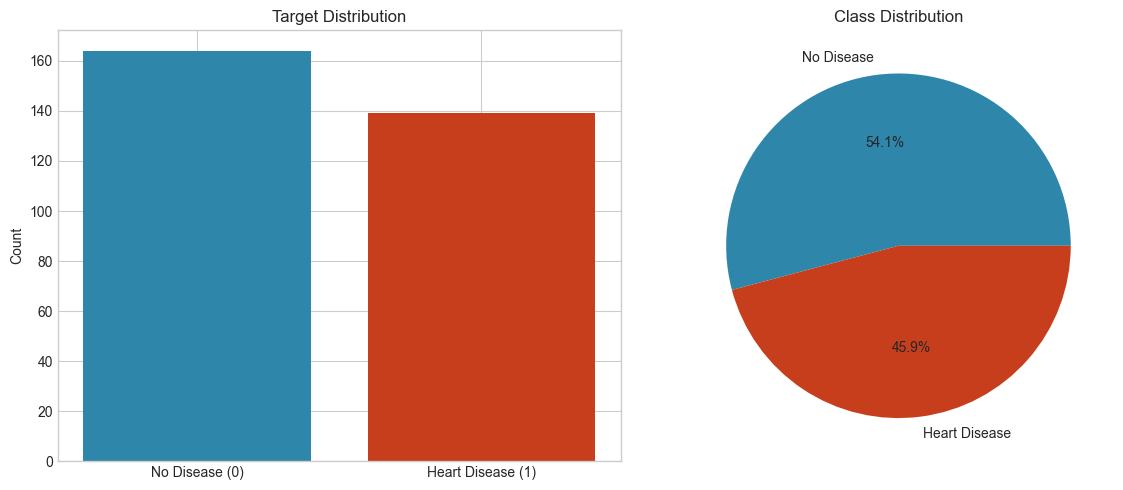

Class Balance: 164:139


In [7]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

target_counts = df['target'].value_counts()
colors = [TARGET_PALETTE[0], TARGET_PALETTE[1]]

# Bar plot
axes[0].bar(['No Disease (0)', 'Heart Disease (1)'], target_counts.values, color=colors)
axes[0].set_ylabel('Count')
axes[0].set_title('Target Distribution')

# Pie chart
axes[1].pie(target_counts.values, labels=['No Disease', 'Heart Disease'], 
            autopct='%1.1f%%', colors=colors)
axes[1].set_title('Class Distribution')

plt.tight_layout()
plt.savefig('../screenshots/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'Class Balance: {target_counts[0]}:{target_counts[1]}')

## 6. Numerical Features Distribution

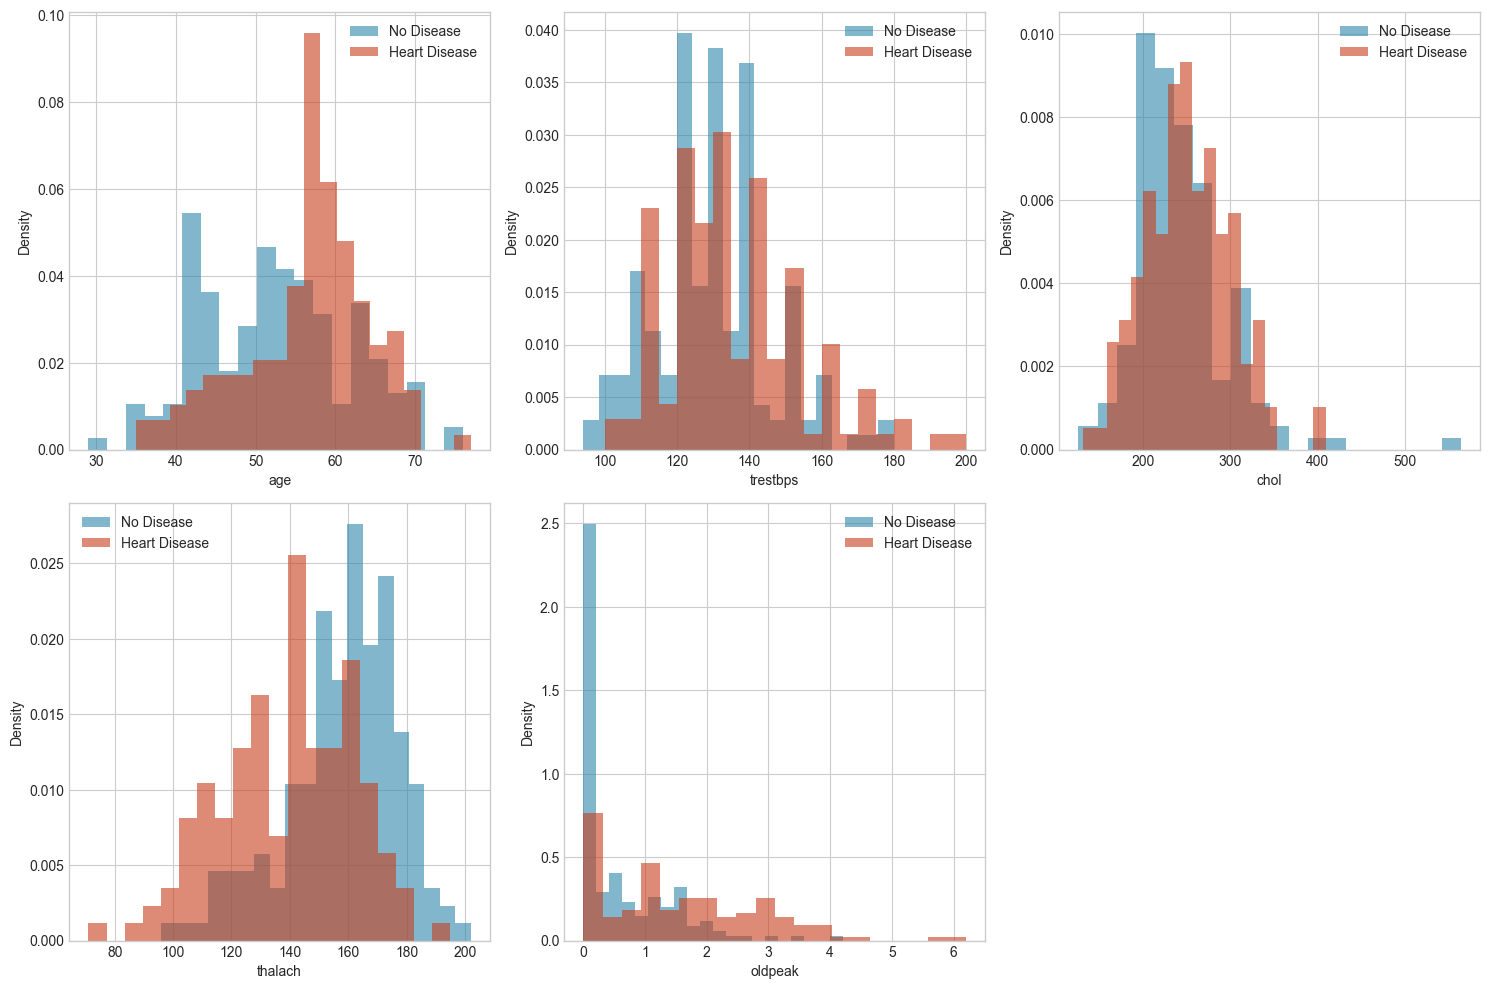

In [8]:
from src.config import NUMERICAL_FEATURES

# Distribution of numerical features by target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(NUMERICAL_FEATURES):
    ax = axes[i]
    for target_val in [0, 1]:
        subset = df[df['target'] == target_val][col]
        label = 'No Disease' if target_val == 0 else 'Heart Disease'
        ax.hist(subset, bins=20, alpha=0.6, color=TARGET_PALETTE[target_val], 
                label=label, density=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend()

axes[-1].axis('off')
plt.tight_layout()
plt.savefig('../screenshots/numerical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Categorical Features Distribution

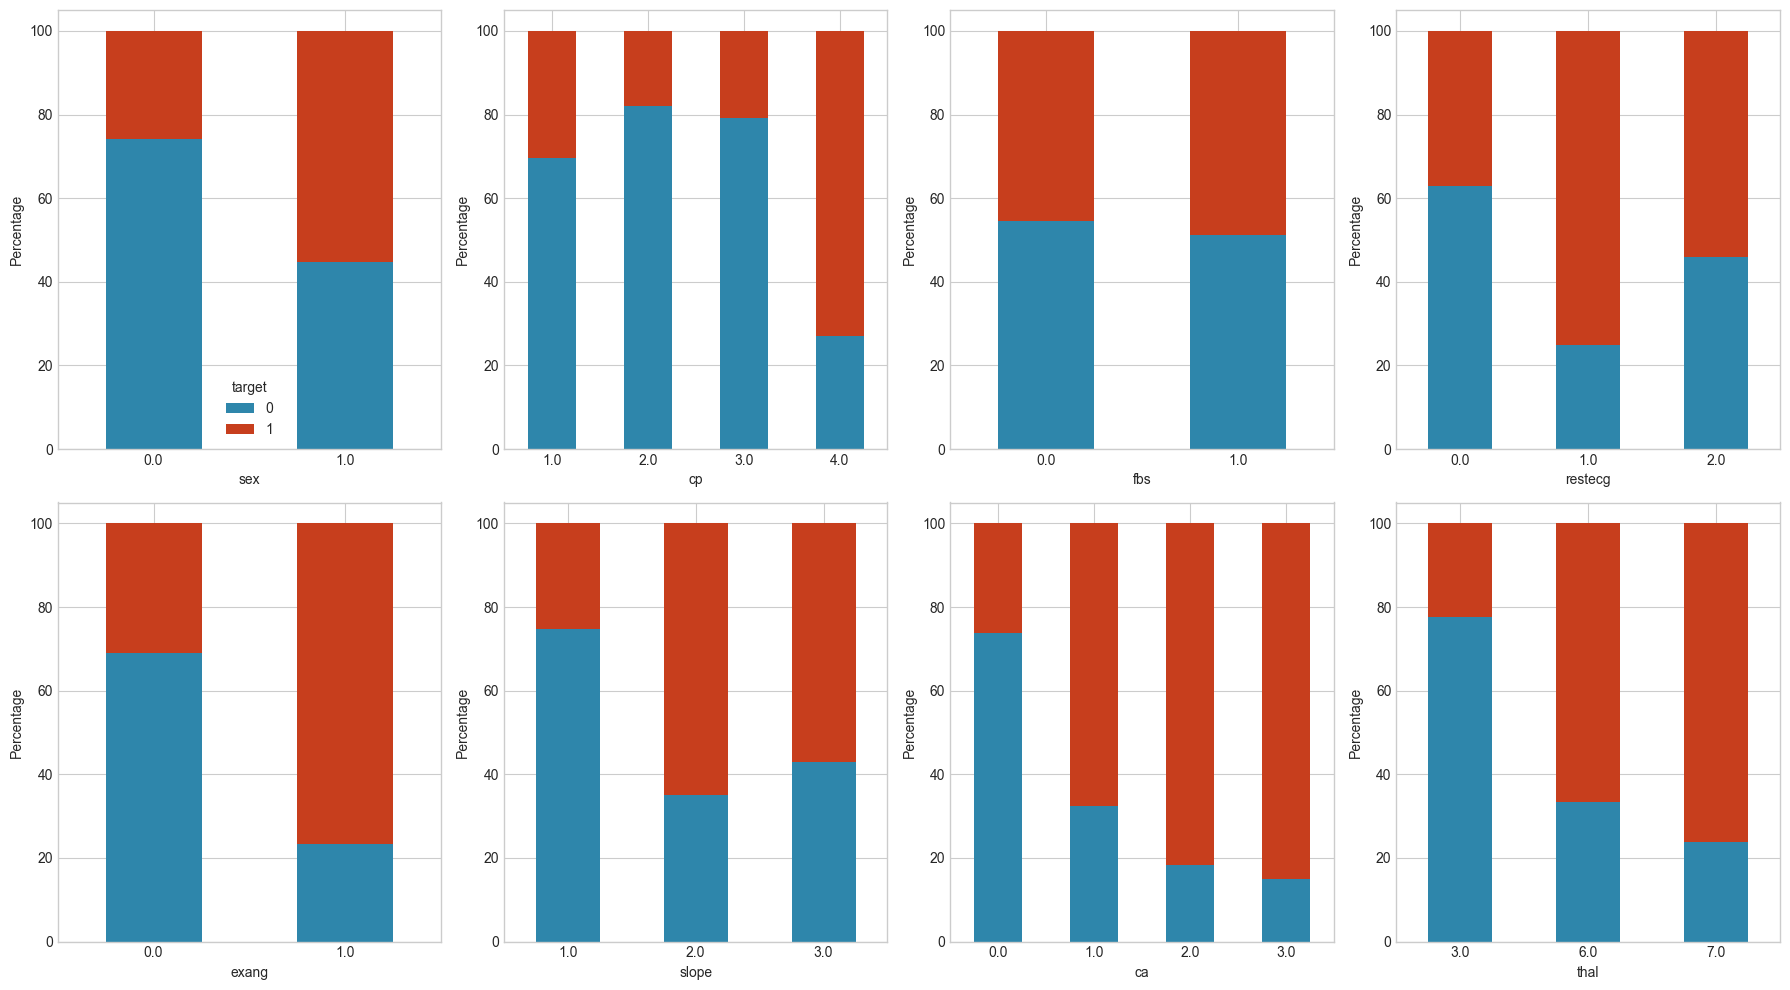

In [9]:
from src.config import CATEGORICAL_FEATURES

# Distribution of categorical features by target
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(CATEGORICAL_FEATURES):
    ax = axes[i]
    ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=ax, color=[TARGET_PALETTE[0], TARGET_PALETTE[1]],
            legend=(i == 0))
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('../screenshots/categorical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Correlation Analysis

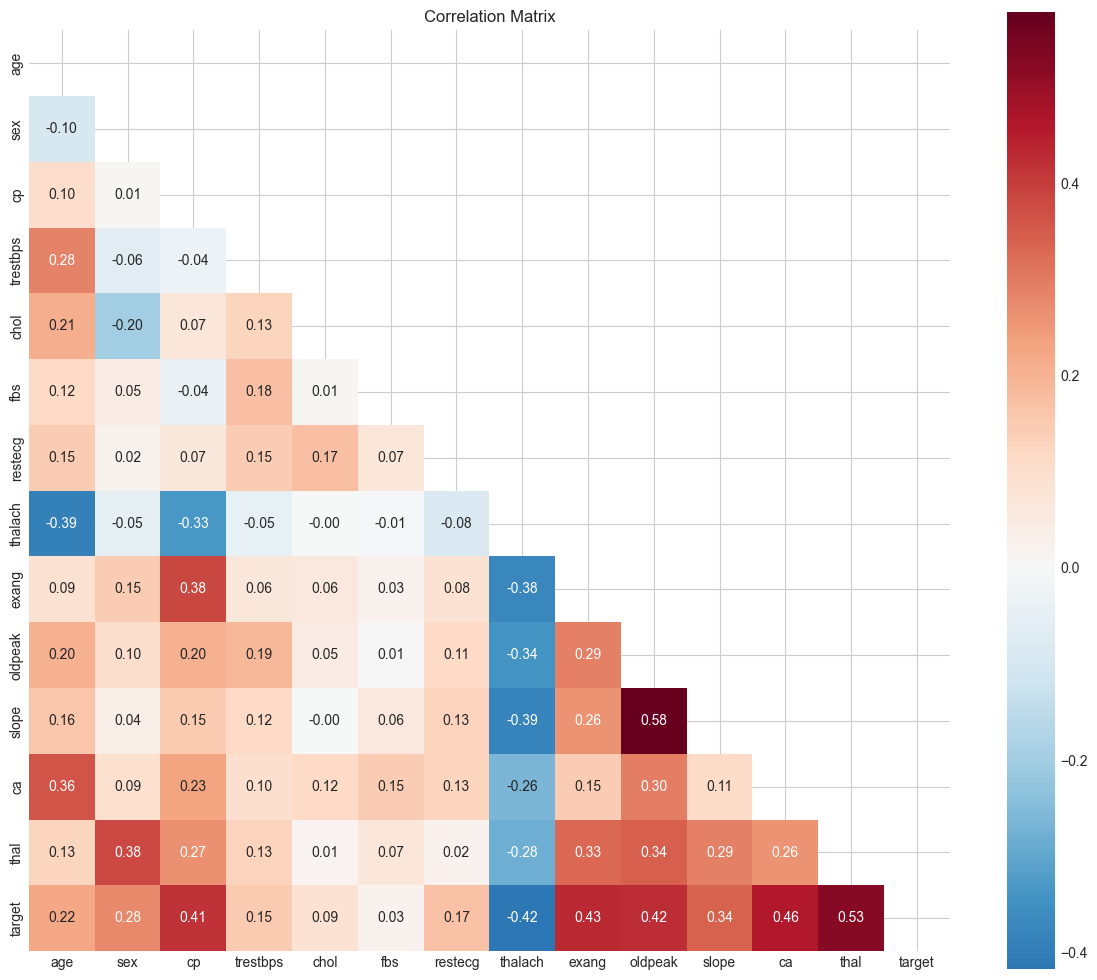

Top correlations with target:
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
thalach     0.417167
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
Name: target, dtype: float64


In [10]:
# Correlation heatmap
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../screenshots/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Top correlations with target
print('Top correlations with target:')
print(corr_matrix['target'].drop('target').abs().sort_values(ascending=False))

## 9. Feature Relationships

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

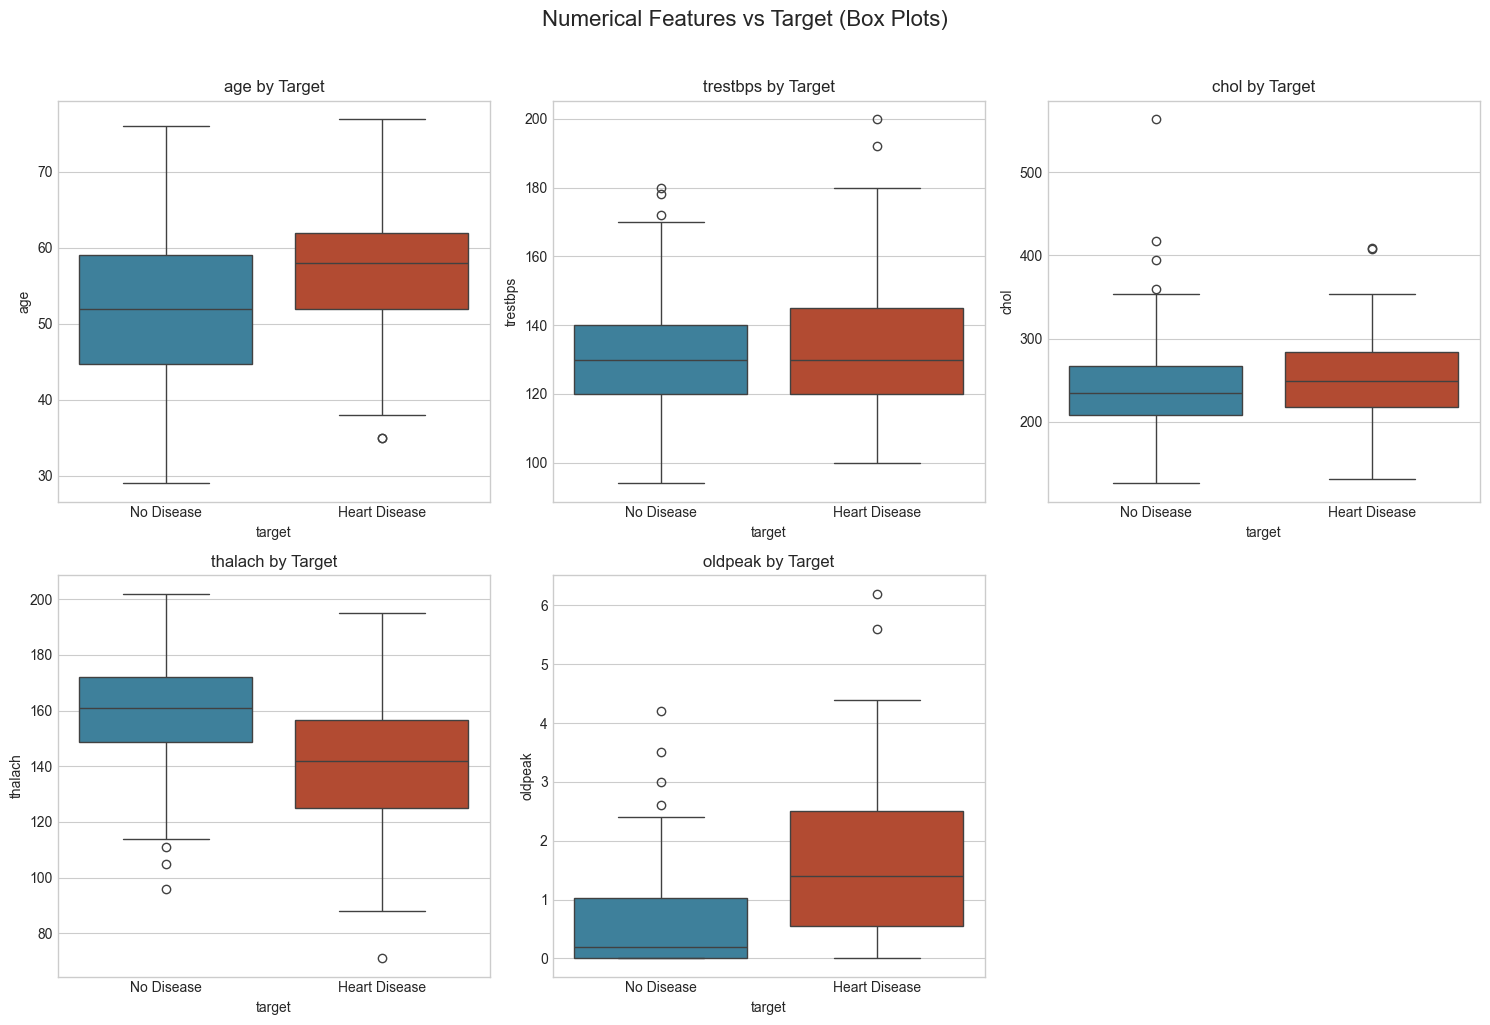

In [11]:
# Box plots of numerical features vs target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(NUMERICAL_FEATURES):
    ax = axes[i]
    sns.boxplot(data=df, x='target', y=col, ax=ax, palette=[TARGET_PALETTE[0], TARGET_PALETTE[1]])
    ax.set_xticklabels(['No Disease', 'Heart Disease'])
    ax.set_title(f'{col} by Target')

axes[-1].axis('off')
plt.suptitle('Numerical Features vs Target (Box Plots)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('../screenshots/boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

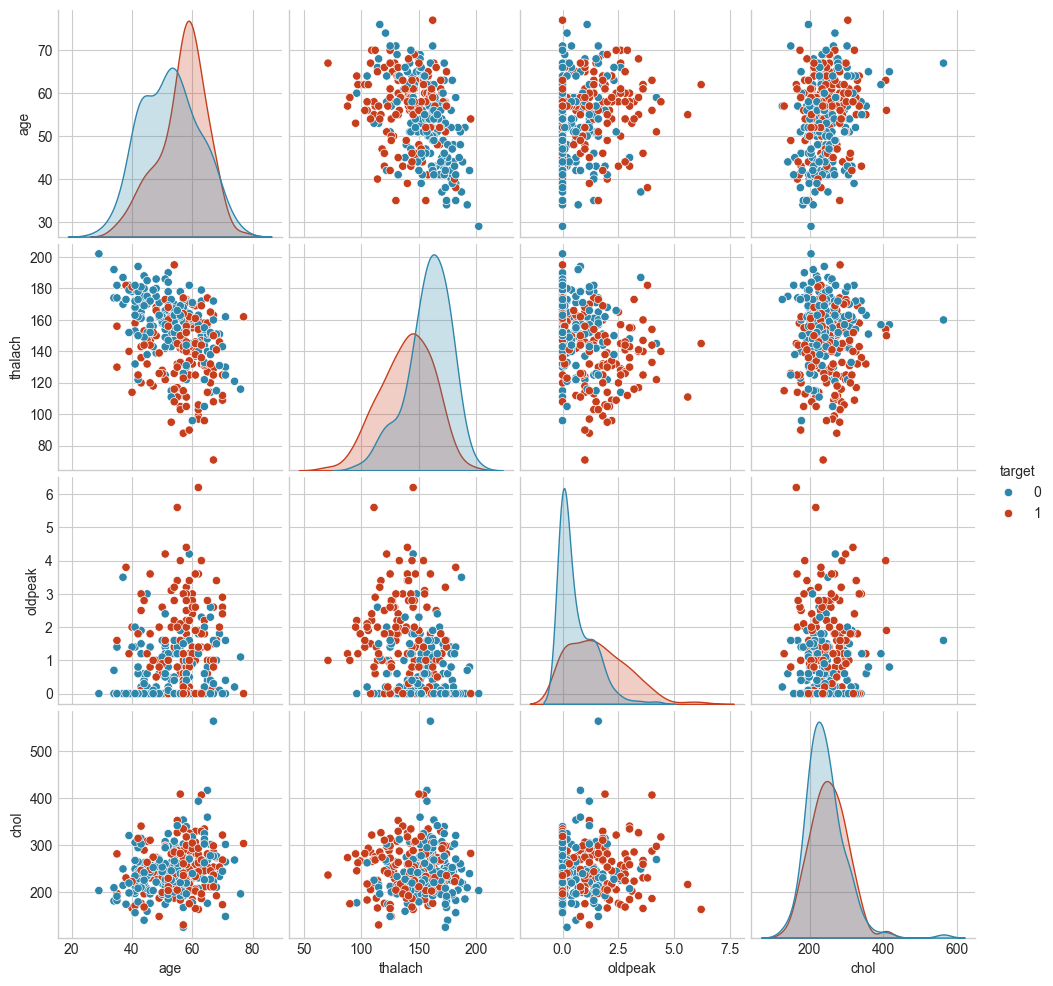

In [12]:
# Pair plot for key numerical features
key_features = ['age', 'thalach', 'oldpeak', 'chol', 'target']
sns.pairplot(df[key_features], hue='target', palette=TARGET_PALETTE, diag_kind='kde')
plt.savefig('../screenshots/pairplot.png', dpi=150, bbox_inches='tight')
plt.show()

## 10. EDA Summary

###  Key findings from EDA:
- Dataset is balanced (~46% no disease, ~54% heart disease)
- Strong predictors: thal, ca, exang, oldpeak, thalach, cp
- Missing values only in ca (4) and thal (2) - handled with mode imputation
- thalach (max heart rate) is lower in heart disease patients
- oldpeak (ST depression) is higher in heart disease patients

---

# Part 2: Model Development

## 11. Data Preprocessing

In [13]:
from src.preprocessing import prepare_data
from src.config import RANDOM_SEED

X_train, X_test, y_train, y_test, preprocessor = prepare_data(df)
print(f'Train: {X_train.shape}, Test: {X_test.shape}')

INFO:src.preprocessing:Missing values before cleaning: 6
INFO:src.preprocessing:Filled ca missing values with mode: 0.0
INFO:src.preprocessing:Filled thal missing values with mode: 3.0
INFO:src.preprocessing:Missing values after cleaning: 0
INFO:src.preprocessing:Training set size: 242
INFO:src.preprocessing:Test set size: 61
INFO:src.preprocessing:Training target distribution:
target
0    0.541322
1    0.458678
Name: proportion, dtype: float64
INFO:src.preprocessing:Transformed training shape: (242, 28)
INFO:src.preprocessing:Transformed test shape: (61, 28)


Train: (242, 28), Test: (61, 28)


## 12. Model Training with MLflow

In [14]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, 
    classification_report, RocCurveDisplay
)

mlflow.set_tracking_uri('file:../mlruns')
mlflow.set_experiment('heart-disease-classification')

<Experiment: artifact_location='file:///Users/sapna/Downloads/mlops-assignment/mlruns/886228166576784572', creation_time=1767684734718, experiment_id='886228166576784572', last_update_time=1767684734718, lifecycle_stage='active', name='heart-disease-classification', tags={}>

In [15]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Train model with cross-validation and return metrics."""
    from sklearn.model_selection import cross_validate
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    
    # Cross-validate with multiple metrics for more robust evaluation
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
    
    # Train final model on full training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Report CV metrics (more reliable for small datasets)
    metrics = {
        'accuracy': cv_results['test_accuracy'].mean(),
        'precision': cv_results['test_precision'].mean(),
        'recall': cv_results['test_recall'].mean(),
        'f1': cv_results['test_f1'].mean(),
        'roc_auc': cv_results['test_roc_auc'].mean(),
        'cv_std': cv_results['test_roc_auc'].std()
    }
    
    return model, metrics, y_pred, y_proba

In [16]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(
        C=1.0, solver='lbfgs', max_iter=1000, random_state=RANDOM_SEED
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, max_depth=10, min_samples_split=5,
        random_state=RANDOM_SEED, n_jobs=-1
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100, max_depth=5, learning_rate=0.1,
        random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss'
    )
}

# Train and evaluate all models
results = {}

for name, model in models.items():
    print(f'\nTraining {name}...')
    
    with mlflow.start_run(run_name=name):
        trained_model, metrics, y_pred, y_proba = evaluate_model(
            model, X_train, X_test, y_train, y_test
        )
        
        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)
        mlflow.sklearn.log_model(trained_model, 'model')
        
        results[name] = {
            'model': trained_model,
            'metrics': metrics,
            'predictions': y_pred,
            'probabilities': y_proba
        }
        
        print(f'  Accuracy: {metrics["accuracy"]:.4f}, ROC-AUC: {metrics["roc_auc"]:.4f}')


Training Logistic Regression...
  Accuracy: 0.8471, ROC-AUC: 0.9018

Training Random Forest...
  Accuracy: 0.8056, ROC-AUC: 0.8949

Training XGBoost...
  Accuracy: 0.7811, ROC-AUC: 0.8682


## 13. Model Comparison

In [17]:
# Model comparison table
comparison_df = pd.DataFrame({
    name: result['metrics'] for name, result in results.items()
}).T.round(4)
comparison_df

,accuracy,precision,recall,f1,roc_auc,cv_std
Logistic Regression,0.8471,0.8768,0.7834,0.8245,0.9018,0.0147
Random Forest,0.8056,0.7910,0.7917,0.7869,0.8949,0.0195
XGBoost,0.7811,0.7685,0.7565,0.7603,0.8682,0.0202


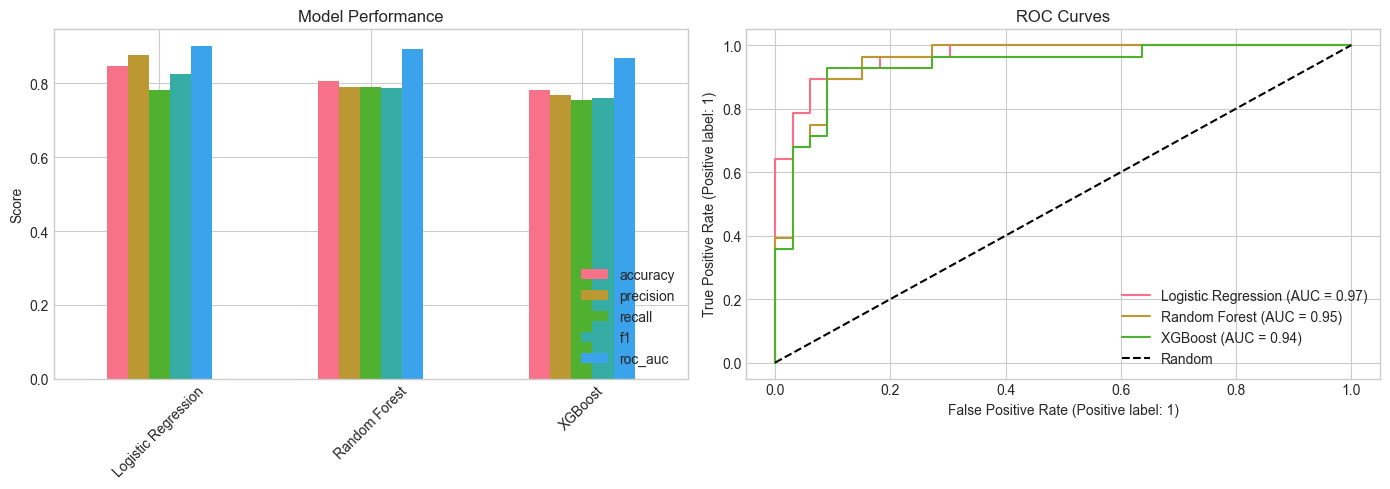

In [18]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics bar chart
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
comparison_df[metrics_to_plot].plot(kind='bar', ax=axes[0])
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance')
axes[0].legend(loc='lower right')
axes[0].tick_params(axis='x', rotation=45)

# ROC Curves
for name, result in results.items():
    RocCurveDisplay.from_predictions(y_test, result['probabilities'], name=name, ax=axes[1])
axes[1].set_title('ROC Curves')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.savefig('../screenshots/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## 14. Best Model Analysis

In [19]:
# Select best model (by ROC-AUC)
best_model_name = comparison_df['roc_auc'].idxmax()
best_result = results[best_model_name]
print(f'Best: {best_model_name} (ROC-AUC: {best_result["metrics"]["roc_auc"]:.4f})')

Best: Logistic Regression (ROC-AUC: 0.9018)


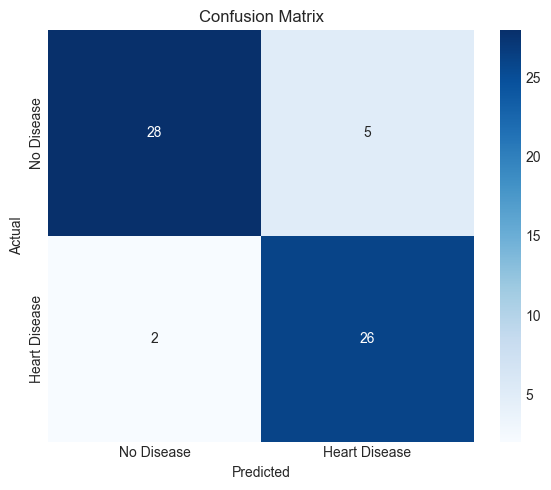

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.93      0.85      0.89        33
Heart Disease       0.84      0.93      0.88        28

     accuracy                           0.89        61
    macro avg       0.89      0.89      0.89        61
 weighted avg       0.89      0.89      0.89        61



In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_result['predictions'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('../screenshots/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print('Classification Report:')
print(classification_report(y_test, best_result['predictions'], 
                            target_names=['No Disease', 'Heart Disease']))

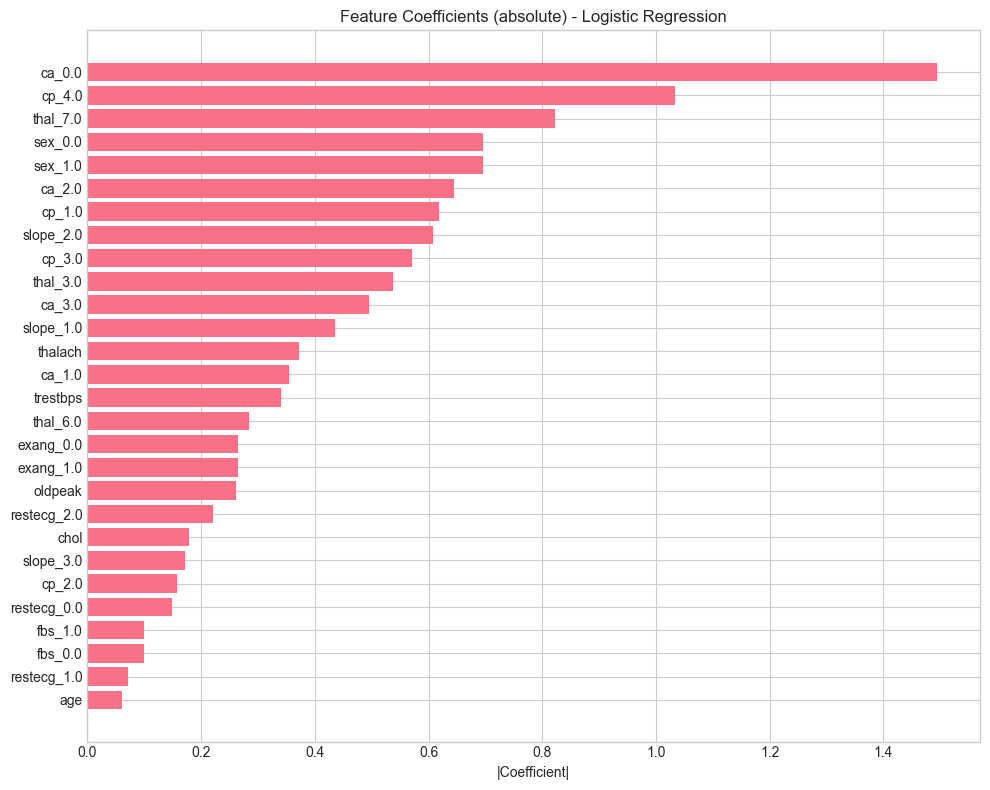

In [21]:
# Feature Importance / Coefficients
feature_names = (NUMERICAL_FEATURES + 
                 list(preprocessor.named_transformers_['cat']
                      .named_steps['encoder'].get_feature_names_out(CATEGORICAL_FEATURES)))

if hasattr(best_result['model'], 'feature_importances_'):
    # Tree-based models (Random Forest, XGBoost)
    importances = best_result['model'].feature_importances_
    title = f'Feature Importance - {best_model_name}'
    xlabel = 'Importance'
elif hasattr(best_result['model'], 'coef_'):
    # Linear models (Logistic Regression)
    importances = np.abs(best_result['model'].coef_[0])
    title = f'Feature Coefficients (absolute) - {best_model_name}'
    xlabel = '|Coefficient|'
else:
    importances = None

if importances is not None:
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=True)
    
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel(xlabel)
    plt.title(title)
    plt.tight_layout()
    plt.savefig('../screenshots/feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()

## 15. Save Best Model

In [22]:
import json
import joblib
from pathlib import Path

models_dir = Path('../models')
models_dir.mkdir(exist_ok=True)

# Save model and preprocessor
joblib.dump(preprocessor, models_dir / 'preprocessor.joblib')
joblib.dump(best_result['model'], models_dir / 'model.joblib')

# Save metadata
metadata = {
    'model_name': best_model_name,
    'metrics': best_result['metrics'],
    'features': NUMERICAL_FEATURES + CATEGORICAL_FEATURES
}
with open(models_dir / 'model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print(f'Saved: model.joblib, preprocessor.joblib, model_metadata.json')

Saved: model.joblib, preprocessor.joblib, model_metadata.json


---

Notebook completed. Best model saved to `../models/` for deployment.